<a href="https://colab.research.google.com/github/KavyaR76/KavyaR76/blob/main/Stock_Market_Analysis_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving AMZN_2006-01-01_to_2018-01-01.csv to AMZN_2006-01-01_to_2018-01-01 (3).csv
Saving GOOGL_2006-01-01_to_2018-01-01.csv to GOOGL_2006-01-01_to_2018-01-01 (3).csv
Saving MSFT_2006-01-01_to_2018-01-01.csv to MSFT_2006-01-01_to_2018-01-01 (3).csv


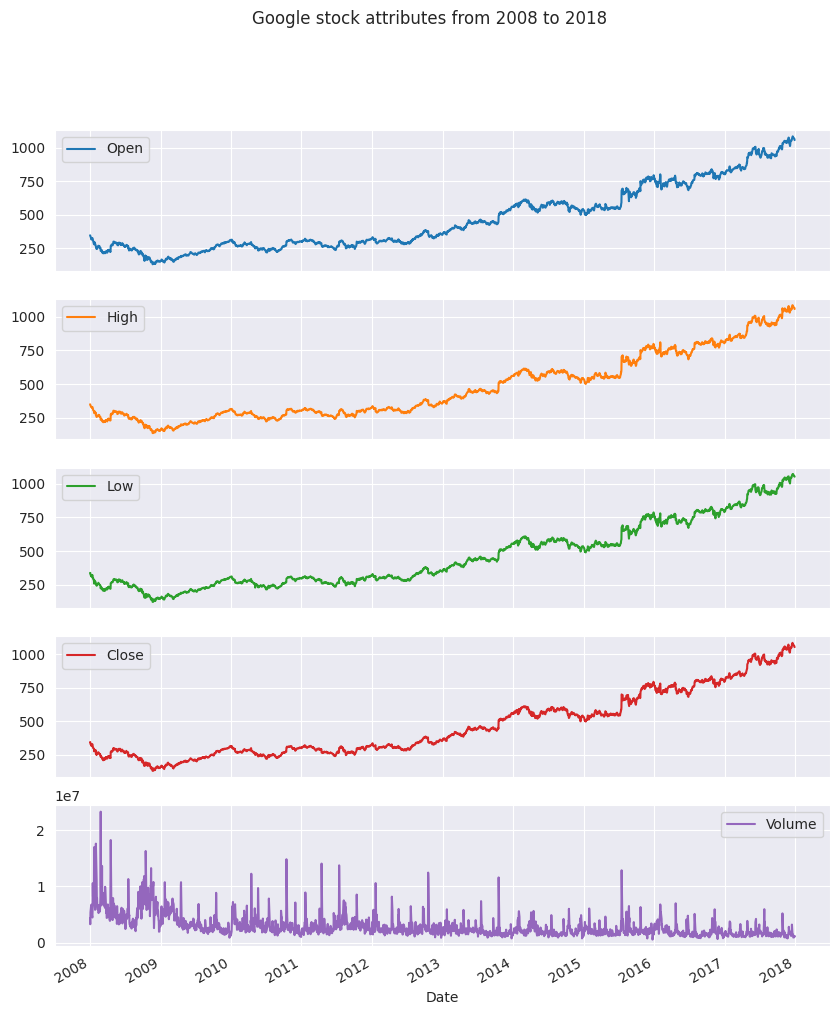

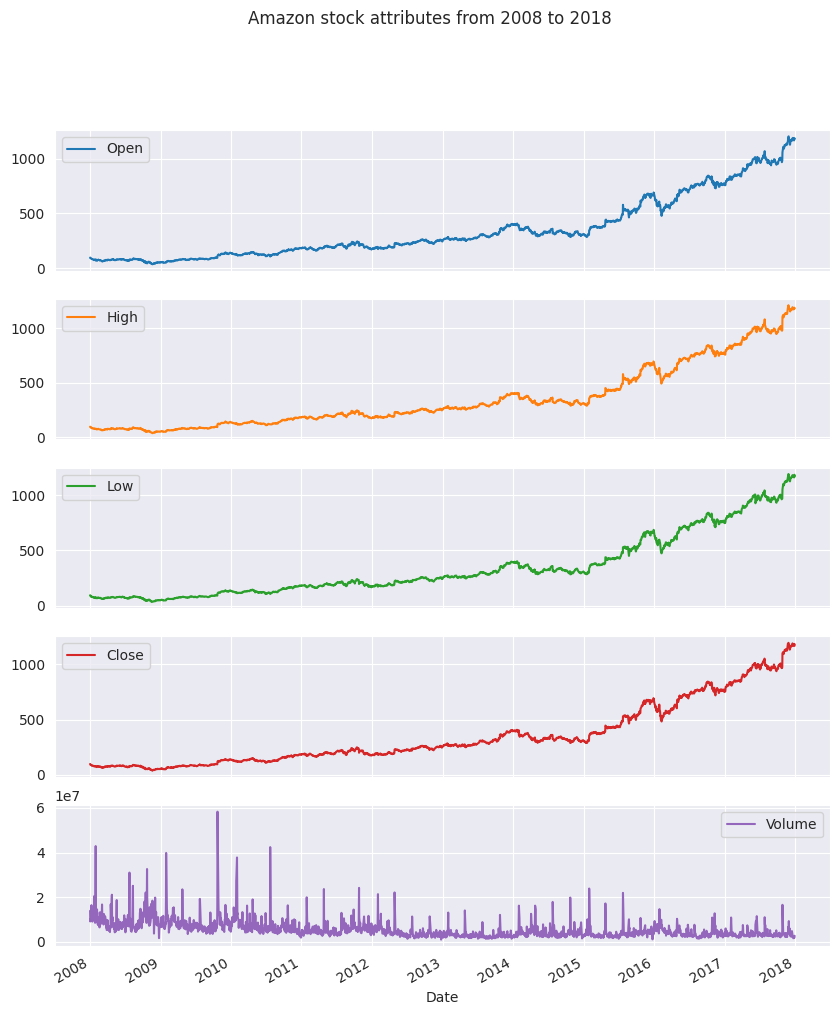

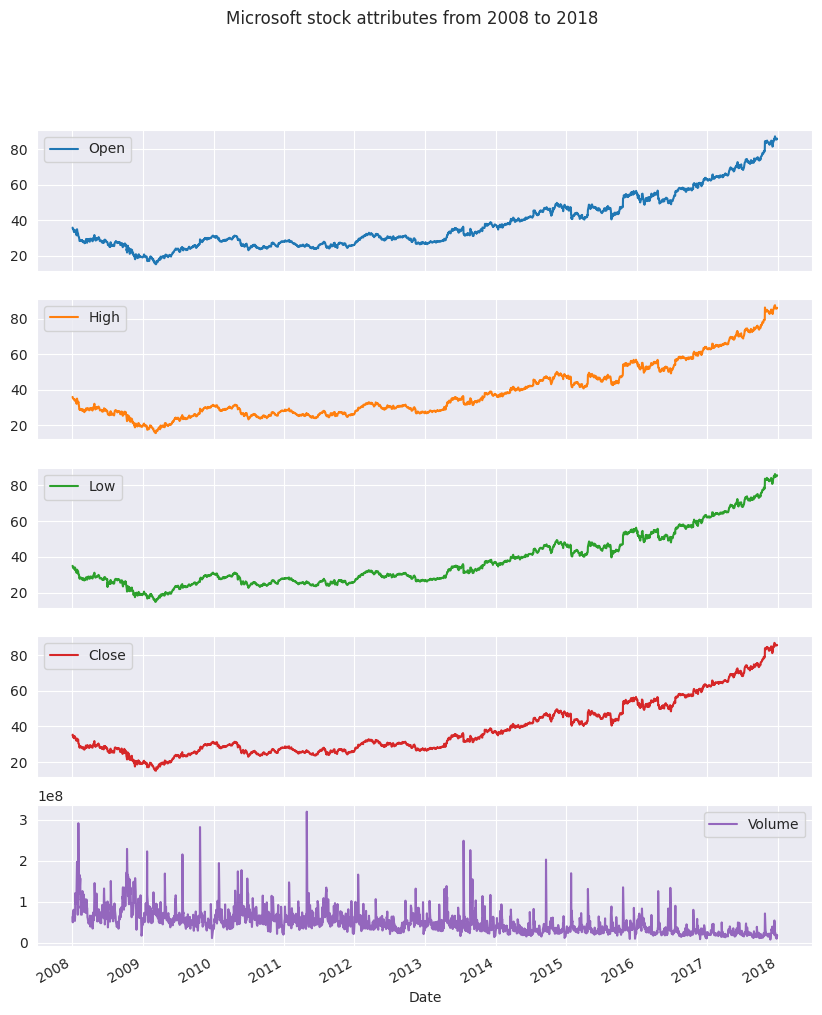

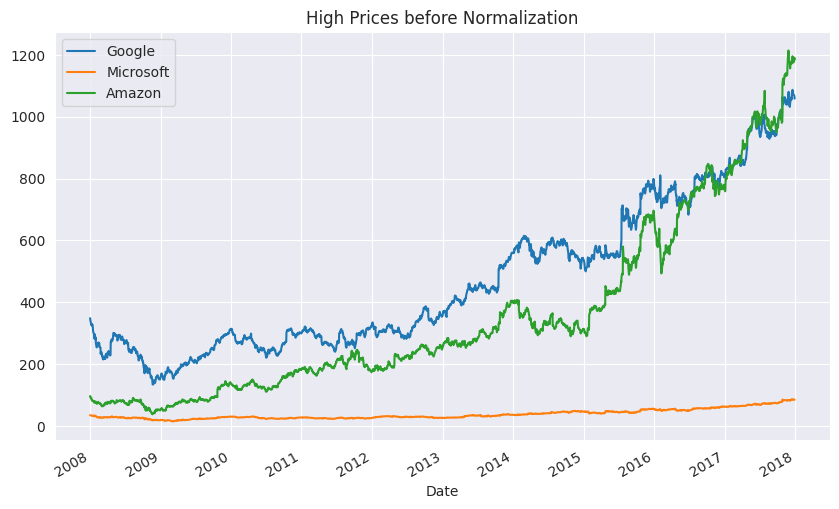

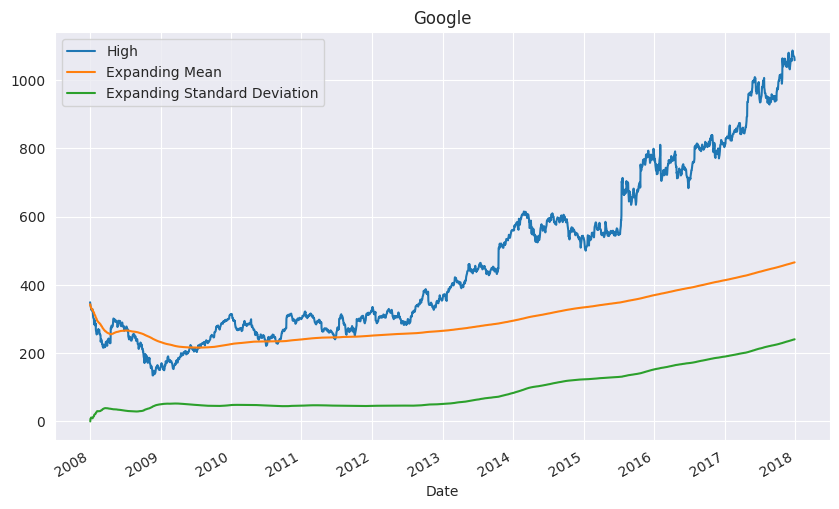

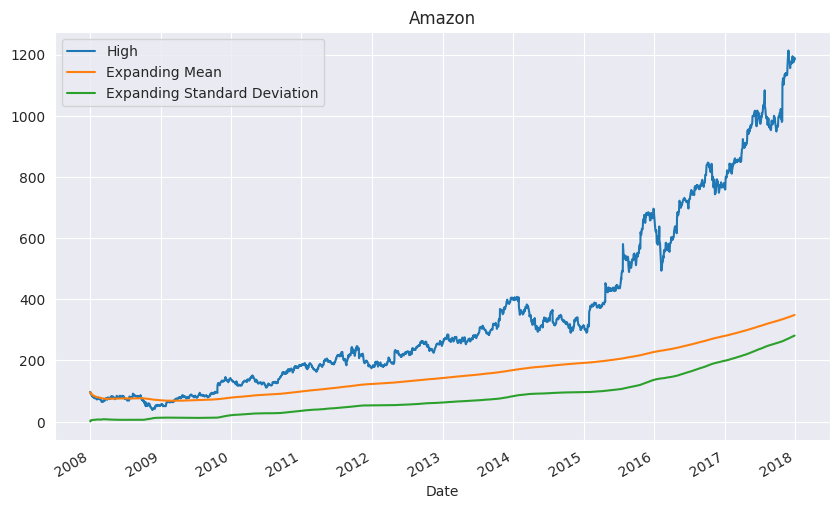

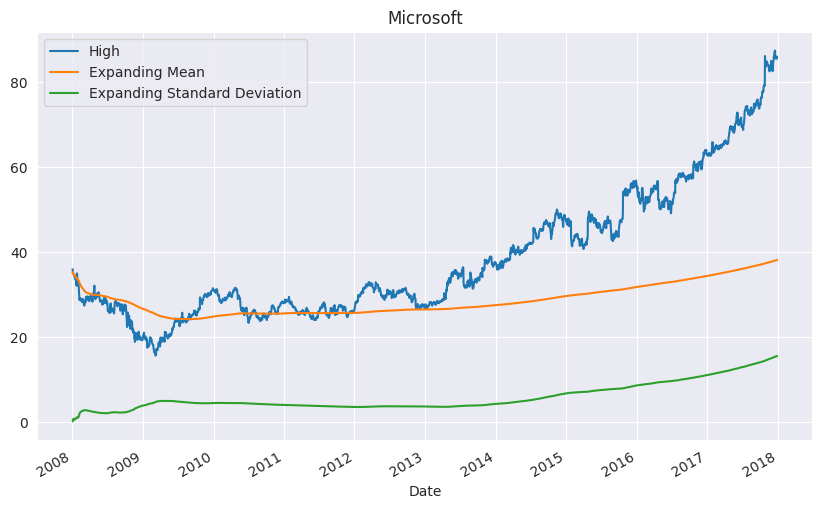

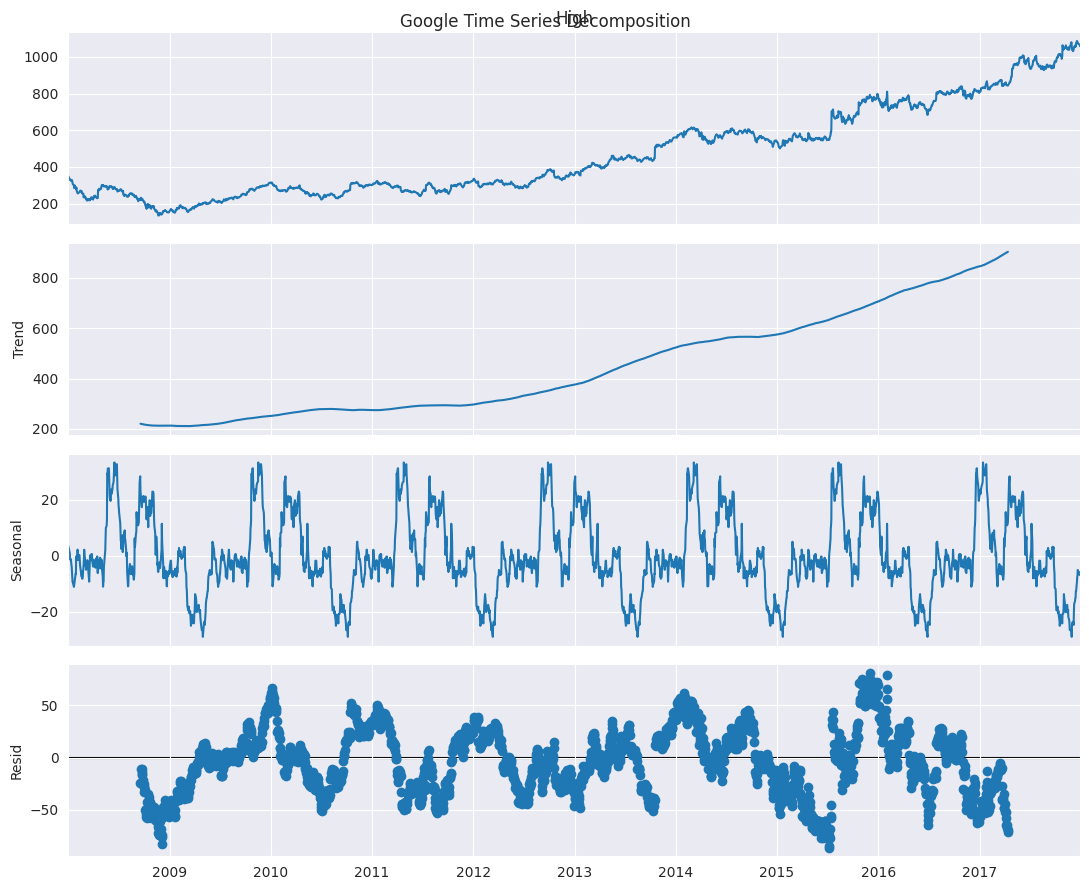

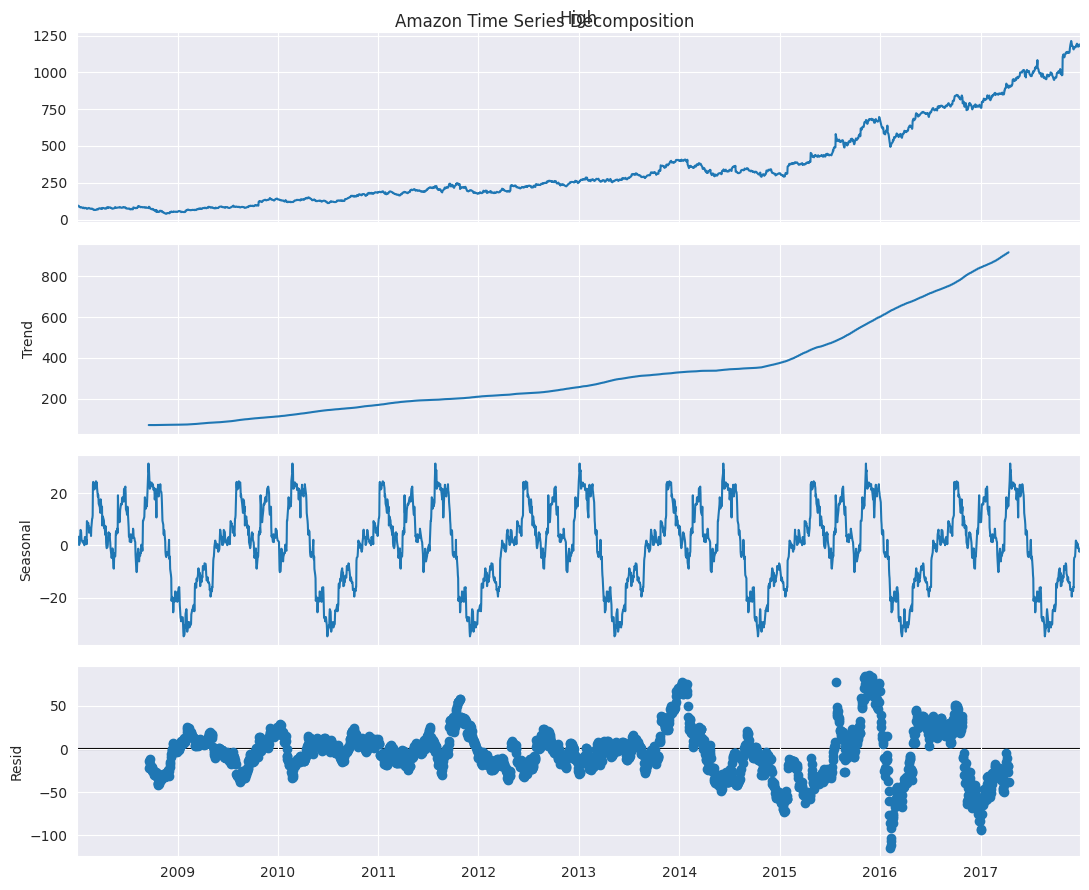

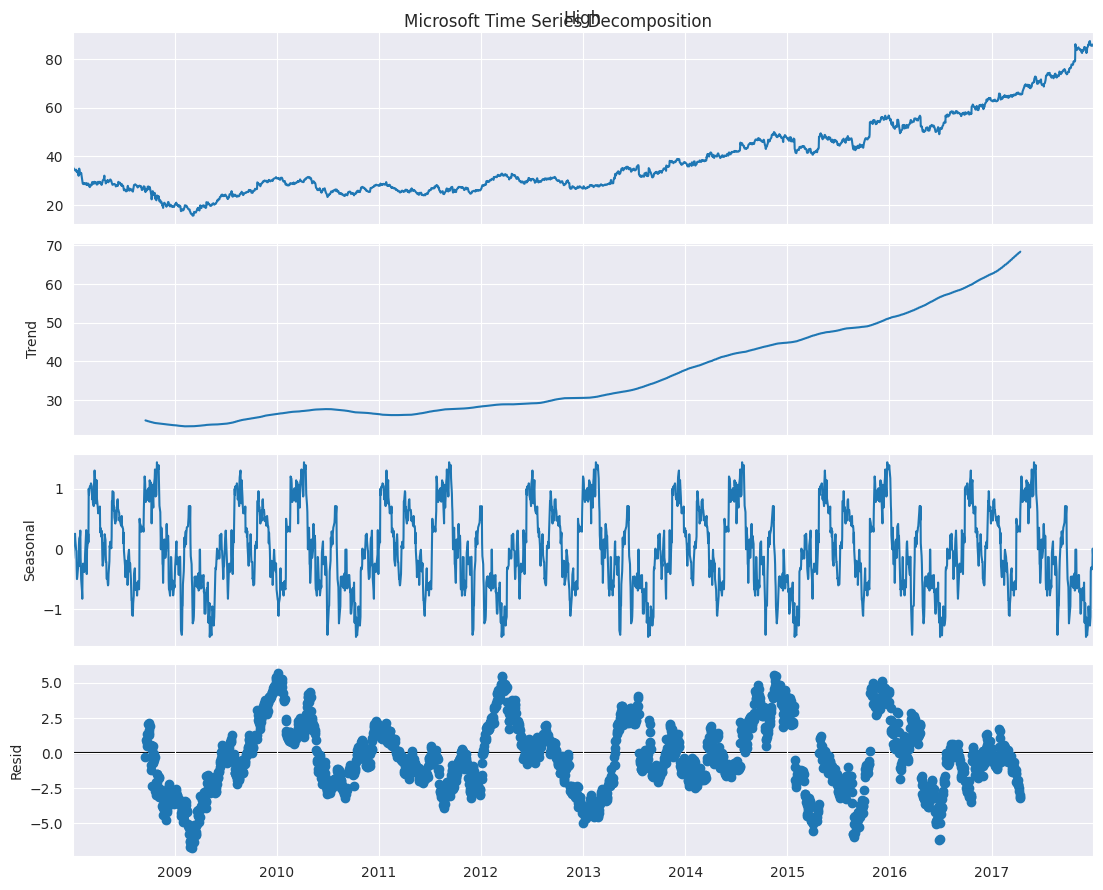

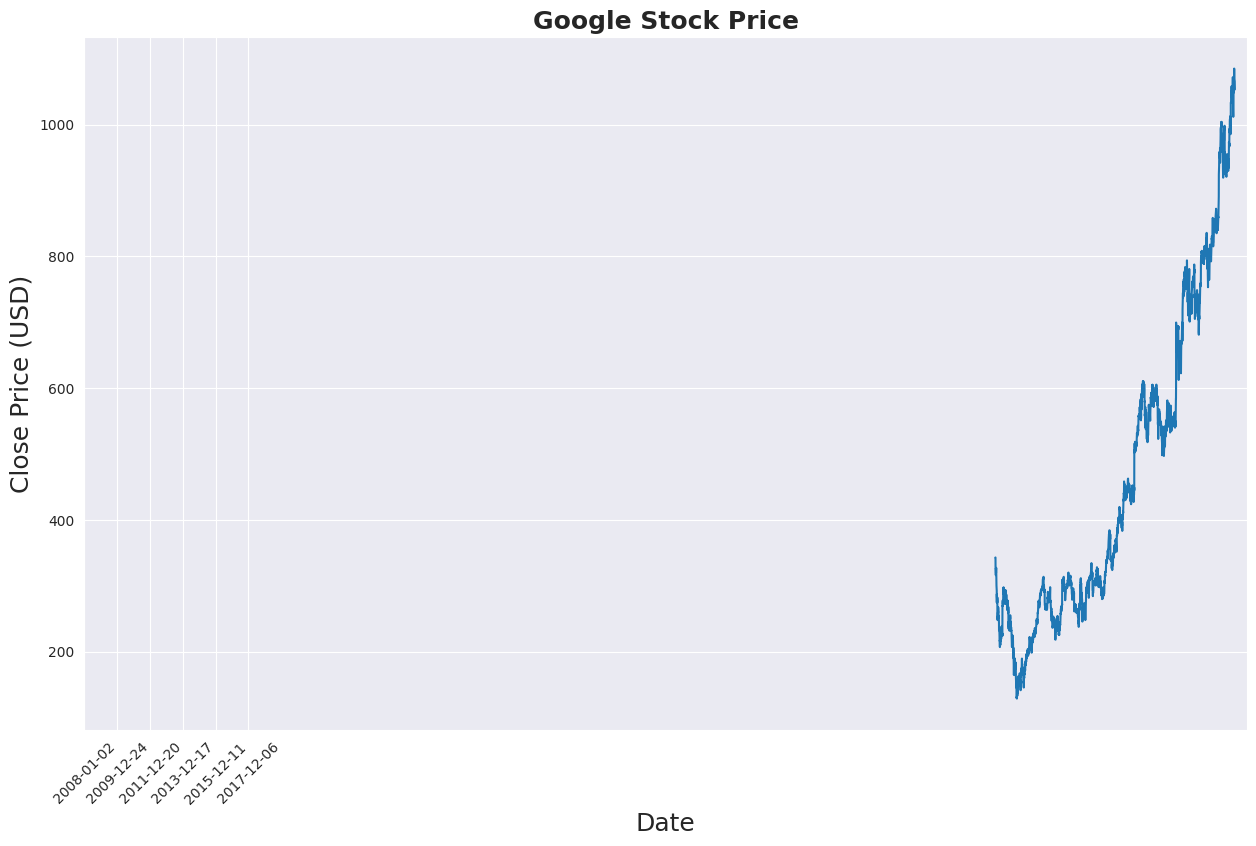

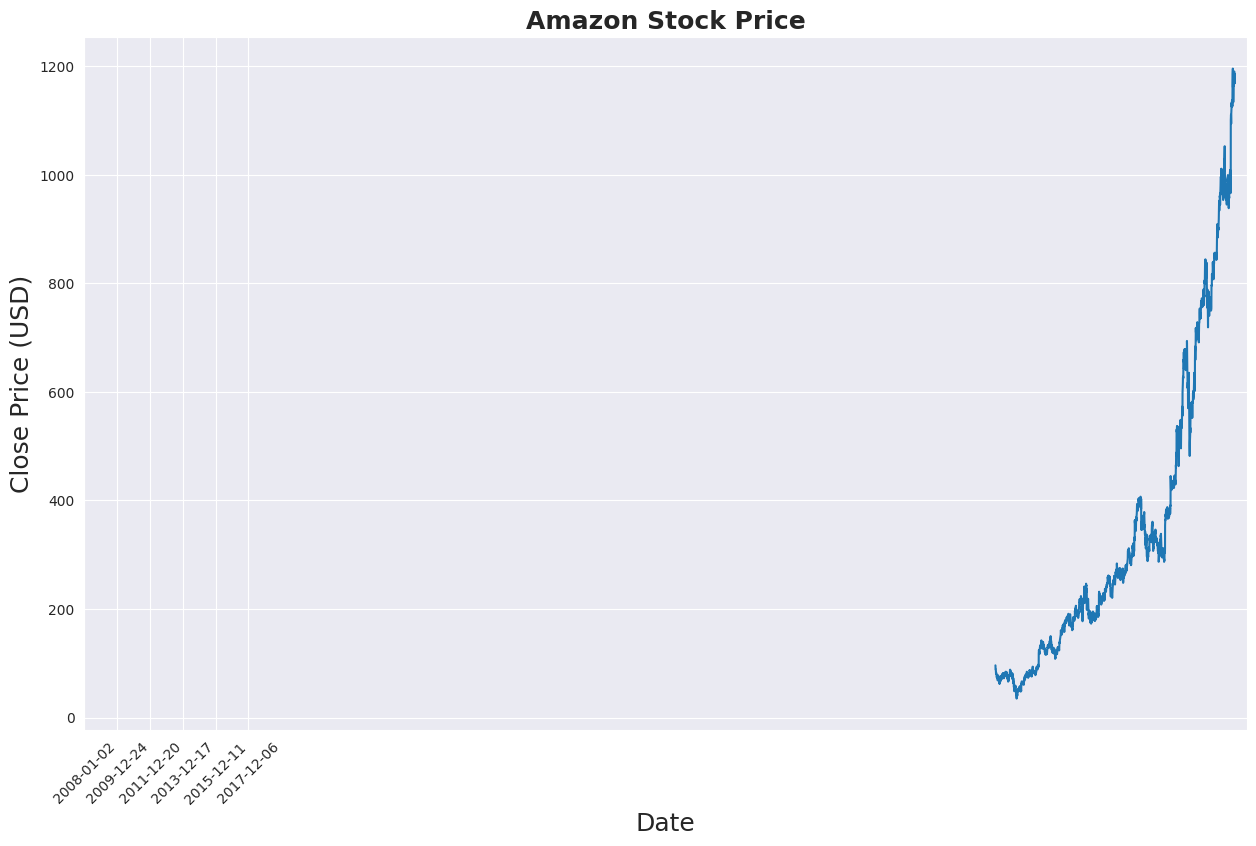

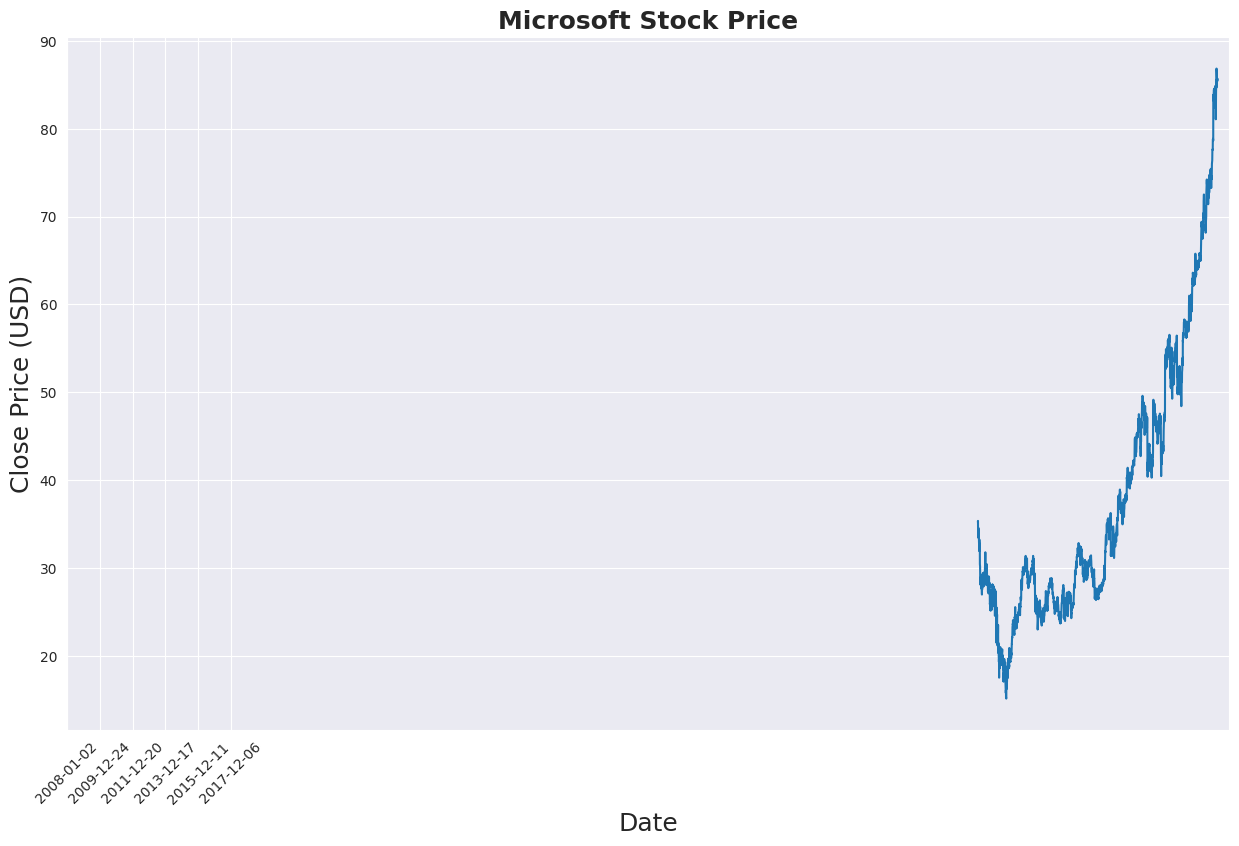

Training and evaluating model for Amazon...
Epoch [10/50], Loss: 0.2426
Epoch [20/50], Loss: 0.0282
Epoch [30/50], Loss: 0.0321
Epoch [40/50], Loss: 0.0185
Epoch [50/50], Loss: 0.0160
Test Loss: 0.2906


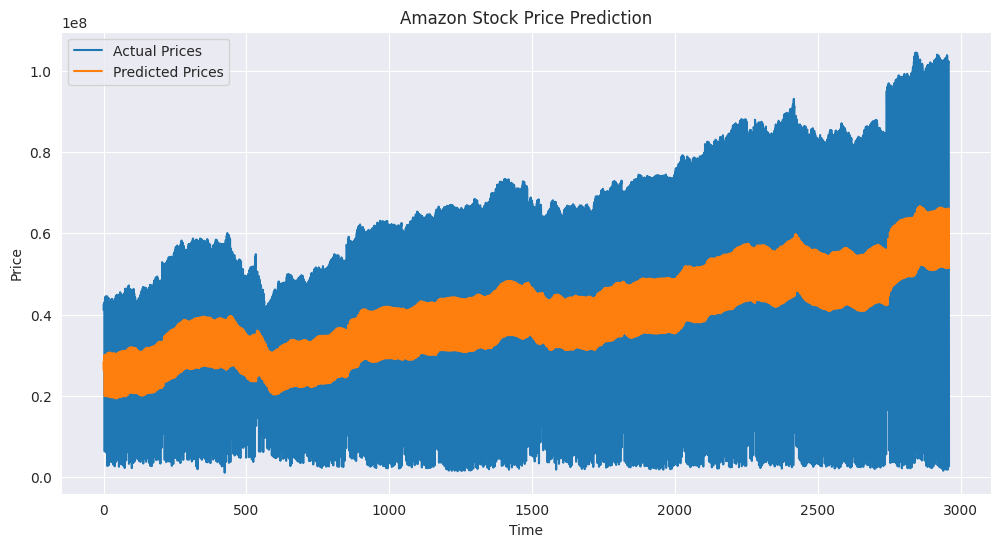

Training and evaluating model for Google...
Epoch [10/50], Loss: 0.2955
Epoch [20/50], Loss: 0.1453
Epoch [30/50], Loss: 0.0412
Epoch [40/50], Loss: 0.0251
Epoch [50/50], Loss: 0.0174
Test Loss: 0.1917


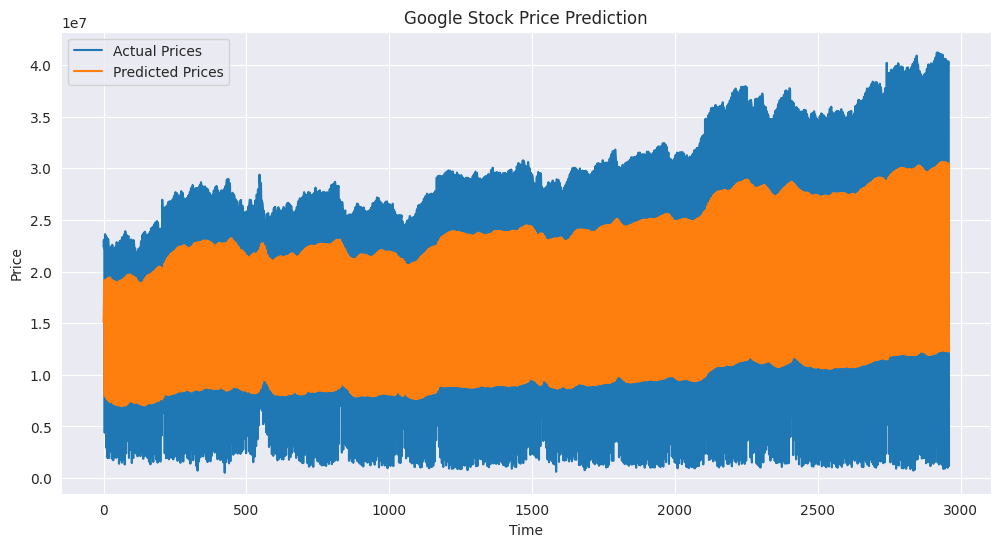

Training and evaluating model for Microsoft...
Epoch [10/50], Loss: 0.2890
Epoch [20/50], Loss: 0.0551
Epoch [30/50], Loss: 0.0375
Epoch [40/50], Loss: 0.0174
Epoch [50/50], Loss: 0.0147
Test Loss: 0.2159


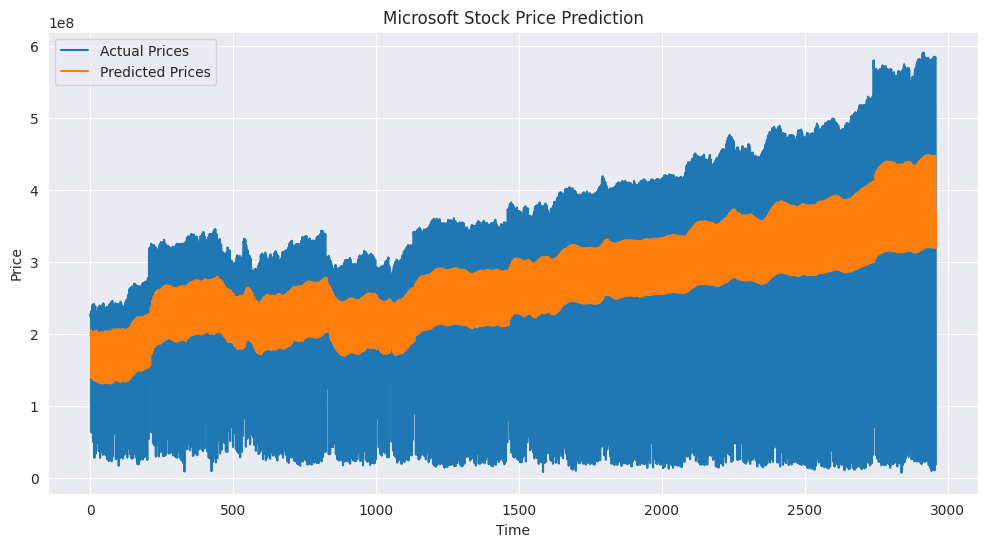

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import rcParams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from google.colab import files

# Upload datasets
uploaded = files.upload()

# Load the datasets
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)

# Filter data from 2008 to 2018
google = google['2008':'2018']
amazon = amazon['2008':'2018']
microsoft = microsoft['2008':'2018']

# Plot stock attributes
def plot_stock_attributes(df, name):
    df.plot(subplots=True, figsize=(10,12))
    plt.suptitle(f'{name} stock attributes from 2008 to 2018')
    plt.show()

plot_stock_attributes(google, 'Google')
plot_stock_attributes(amazon, 'Amazon')
plot_stock_attributes(microsoft, 'Microsoft')

# Plotting High prices before normalization
plt.figure(figsize=(10, 6))
google.High.plot(label='Google')
microsoft.High.plot(label='Microsoft')
amazon.High.plot(label='Amazon')
plt.legend()
plt.title('High Prices before Normalization')
plt.show()

# Expanding window functions
def plot_expanding_window(df, name):
    df_mean = df.Close.expanding().mean()
    df_std = df.Close.expanding().std()
    plt.figure(figsize=(10, 6))
    df.High.plot(label='High')
    df_mean.plot(label='Expanding Mean')
    df_std.plot(label='Expanding Standard Deviation')
    plt.legend()
    plt.title(name)
    plt.show()

plot_expanding_window(google, 'Google')
plot_expanding_window(amazon, 'Amazon')
plot_expanding_window(microsoft, 'Microsoft')

# Time series decomposition
def plot_decomposition(df, name):
    rcParams['figure.figsize'] = 11, 9
    decomposed = sm.tsa.seasonal_decompose(df["High"], period=360)  # Assuming annual frequency
    decomposed.plot()
    plt.suptitle(f'{name} Time Series Decomposition')
    plt.show()

plot_decomposition(google, 'Google')
plot_decomposition(amazon, 'Amazon')
plot_decomposition(microsoft, 'Microsoft')

# Plotting Close prices with seaborn
def plot_close_prices(df, name):
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 9))
    plt.plot(df[['Close']])
    plt.xticks(range(0, df.shape[0], 500), df.index[::500].strftime('%Y-%m-%d'), rotation=45)
    plt.title(f"{name} Stock Price", fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price (USD)', fontsize=18)
    plt.show()

plot_close_prices(google, 'Google')
plot_close_prices(amazon, 'Amazon')
plot_close_prices(microsoft, 'Microsoft')



# Load and preprocess data
def preprocess_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

def normalize_data(df):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
    return pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume'], index=df.index), scaler

# Load datasets
amazon_data = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
google_data = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
microsoft_data = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv')

# Preprocess data
amazon_data = preprocess_data(amazon_data)
google_data = preprocess_data(google_data)
microsoft_data = preprocess_data(microsoft_data)

# Normalize data
amazon_scaled, amazon_scaler = normalize_data(amazon_data)
google_scaled, google_scaler = normalize_data(google_data)
microsoft_scaled, microsoft_scaler = normalize_data(microsoft_data)

# Create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 60
amazon_X, amazon_Y = create_dataset(amazon_scaled.values, look_back)
google_X, google_Y = create_dataset(google_scaled.values, look_back)
microsoft_X, microsoft_Y = create_dataset(microsoft_scaled.values, look_back)

# Split data
def split_data(X, Y):
    return train_test_split(X, Y, test_size=0.2, shuffle=False)

amazon_X_train, amazon_X_test, amazon_Y_train, amazon_Y_test = split_data(amazon_X, amazon_Y)
google_X_train, google_X_test, google_Y_train, google_Y_test = split_data(google_X, google_Y)
microsoft_X_train, microsoft_X_test, microsoft_Y_train, microsoft_Y_test = split_data(microsoft_X, microsoft_Y)

# Define GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

def create_model(input_size, hidden_size, output_size):
    return GRUModel(input_size, hidden_size, output_size)

# Train and evaluate model
def train_model(model, X_train, Y_train, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        inputs = Variable(torch.Tensor(X_train))
        labels = Variable(torch.Tensor(Y_train))

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

def evaluate_model(model, X_test, Y_test):
    model.eval()
    with torch.no_grad():
        inputs = Variable(torch.Tensor(X_test))
        labels = Variable(torch.Tensor(Y_test))
        outputs = model(inputs)
        loss = mean_squared_error(labels.numpy(), outputs.numpy())
        print(f'Test Loss: {loss:.4f}')
        return outputs.numpy()

def train_and_evaluate(dataset_name, X_train, Y_train, X_test, Y_test, scaler):
    print(f"Training and evaluating model for {dataset_name}...")

    input_size = X_train.shape[2]
    hidden_size = 50
    output_size = Y_train.shape[1]

    model = create_model(input_size, hidden_size, output_size)
    train_model(model, X_train, Y_train)
    predictions = evaluate_model(model, X_test, Y_test)

    # Reshape and inverse transform predictions and actual values
    predictions = predictions.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    predicted_prices = scaler.inverse_transform(
        np.concatenate([np.zeros((predictions.shape[0], 4)), predictions], axis=1)
    )[:, -1]

    actual_prices = scaler.inverse_transform(
        np.concatenate([np.zeros((Y_test.shape[0], 4)), Y_test], axis=1)
    )[:, -1]

    # Plot the predictions
    plot_predictions(actual_prices, predicted_prices, f'{dataset_name} Stock Price Prediction')

def plot_predictions(true_values, predicted_values, title):
    plt.figure(figsize=(12, 6))
    plt.plot(true_values, label='Actual Prices')
    plt.plot(predicted_values, label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Train and evaluate for each dataset
train_and_evaluate('Amazon', amazon_X_train, amazon_Y_train, amazon_X_test, amazon_Y_test, amazon_scaler)
train_and_evaluate('Google', google_X_train, google_Y_train, google_X_test, google_Y_test, google_scaler)
train_and_evaluate('Microsoft', microsoft_X_train, microsoft_Y_train, microsoft_X_test, microsoft_Y_test, microsoft_scaler)



# New Section

# New Section